In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("events.csv")

In [30]:
df

,Название,Цена (₸),Категория,Партнёр,Дата,Город
0,Фестиваль Vincent OpenFest 2025 в Каскелене,10 000,Фестивали,Camila (м.п),06.07.2025 16:00:00,almaty
1,Шоу Ирины Кайратовны на Алаколе,40 000,Концерты,Мухаббат Comfort,12.07.2025 21:00:00,almaty
2,Комедийное шоу «Цифровой след» (29 июня),4 000,События в Almaty Central Stand Up Club,Almaty Central Stand Up Club,29.06.2025 21:00:00,almaty
3,Музыкальный этно-фестиваль Qunar Etno Fest 2025,5 000,Фестивали,Qunar Fest,19.07.2025 15:00:00,almaty
4,Теннисный фестиваль Almaty Open ATP 250 (13 ок...,3 500,Спорт,Владимир (м.п),13.10.2025 11:00:00,almaty
...,...,...,...,...,...,...
243,"Турбо-тур «Ыбык, Караман Ата, Бозжыра, Кызылкуп»",25 000,Туризм,Мангыстау Сафари,01.07.2025 07:45:00,aktau
244,"Тур «Ыбык, Караман ата»",11 500,Туризм,Мангыстау Сафари,29.06.2025 12:45:00,aktau
245,Open-Air Drift-show,7 000,Концерты,Азамат Open-Air Drift-show,06.07.2025 11:00:00,kokshetau
246,Двойной стендап-концерт Ербола Бекишева и Сыры...,4 000,Stand Up,Виталий Stand Up Soultustik,12.07.2025 20:00:00,taraz


In [31]:
df.describe()

,Название,Цена (₸),Категория,Партнёр,Дата,Город
count,248,248,248,248,248,248
unique,227,63,33,62,145,10
top,Концерт Jennifer Lopez в Астане,3 000,Туры от Melon Travel,MELONTRAVEL,29.06.2025 09:00:00,almaty
freq,6,37,25,29,9,170


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Название   248 non-null    object
 1   Цена (₸)   248 non-null    object
 2   Категория  248 non-null    object
 3   Партнёр    248 non-null    object
 4   Дата       248 non-null    object
 5   Город      248 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [33]:
df.isna().sum()

Название     0
Цена (₸)     0
Категория    0
Партнёр      0
Дата         0
Город        0
dtype: int64

In [34]:
df["Цена (₸)"] = df["Цена (₸)"].str.replace("₸", "", regex=False) \
                                .str.replace(" ", "", regex=False) \
                                .astype(float)

In [35]:
df["Цена (₸)"].mean()

18954.584677419356

In [36]:
df.columns

Index(['Название', 'Цена (₸)', 'Категория', 'Партнёр', 'Дата', 'Город'], dtype='object')

In [37]:
df = df.rename(columns={
    "Цена (₸)" : "price",
    "Название" : "name",
    "Категория": "category",
    "Партнёр": "partner",
    "Дата": "date"
})

In [38]:
# Какой процент данных мы удаляем?
100*(22/193)

11.398963730569948

In [39]:
df

,name,price,category,partner,date,Город
0,Фестиваль Vincent OpenFest 2025 в Каскелене,10000.0,Фестивали,Camila (м.п),06.07.2025 16:00:00,almaty
1,Шоу Ирины Кайратовны на Алаколе,40000.0,Концерты,Мухаббат Comfort,12.07.2025 21:00:00,almaty
2,Комедийное шоу «Цифровой след» (29 июня),4000.0,События в Almaty Central Stand Up Club,Almaty Central Stand Up Club,29.06.2025 21:00:00,almaty
3,Музыкальный этно-фестиваль Qunar Etno Fest 2025,5000.0,Фестивали,Qunar Fest,19.07.2025 15:00:00,almaty
4,Теннисный фестиваль Almaty Open ATP 250 (13 ок...,3500.0,Спорт,Владимир (м.п),13.10.2025 11:00:00,almaty
...,...,...,...,...,...,...
243,"Турбо-тур «Ыбык, Караман Ата, Бозжыра, Кызылкуп»",25000.0,Туризм,Мангыстау Сафари,01.07.2025 07:45:00,aktau
244,"Тур «Ыбык, Караман ата»",11500.0,Туризм,Мангыстау Сафари,29.06.2025 12:45:00,aktau
245,Open-Air Drift-show,7000.0,Концерты,Азамат Open-Air Drift-show,06.07.2025 11:00:00,kokshetau
246,Двойной стендап-концерт Ербола Бекишева и Сыры...,4000.0,Stand Up,Виталий Stand Up Soultustik,12.07.2025 20:00:00,taraz


In [40]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M:%S', errors='coerce')


In [41]:
df["month"] = df['date'].dt.month

In [42]:
df

,name,price,category,partner,date,Город,month
0,Фестиваль Vincent OpenFest 2025 в Каскелене,10000.0,Фестивали,Camila (м.п),2025-07-06 16:00:00,almaty,7
1,Шоу Ирины Кайратовны на Алаколе,40000.0,Концерты,Мухаббат Comfort,2025-07-12 21:00:00,almaty,7
2,Комедийное шоу «Цифровой след» (29 июня),4000.0,События в Almaty Central Stand Up Club,Almaty Central Stand Up Club,2025-06-29 21:00:00,almaty,6
3,Музыкальный этно-фестиваль Qunar Etno Fest 2025,5000.0,Фестивали,Qunar Fest,2025-07-19 15:00:00,almaty,7
4,Теннисный фестиваль Almaty Open ATP 250 (13 ок...,3500.0,Спорт,Владимир (м.п),2025-10-13 11:00:00,almaty,10
...,...,...,...,...,...,...,...
243,"Турбо-тур «Ыбык, Караман Ата, Бозжыра, Кызылкуп»",25000.0,Туризм,Мангыстау Сафари,2025-07-01 07:45:00,aktau,7
244,"Тур «Ыбык, Караман ата»",11500.0,Туризм,Мангыстау Сафари,2025-06-29 12:45:00,aktau,6
245,Open-Air Drift-show,7000.0,Концерты,Азамат Open-Air Drift-show,2025-07-06 11:00:00,kokshetau,7
246,Двойной стендап-концерт Ербола Бекишева и Сыры...,4000.0,Stand Up,Виталий Stand Up Soultustik,2025-07-12 20:00:00,taraz,7


In [43]:
df.isna().sum()

name        0
price       0
category    0
partner     0
date        0
Город       0
month       0
dtype: int64

In [44]:
df["month"].unique()

array([ 7,  6, 10,  8,  9, 11])

In [45]:
df = df.dropna()

In [46]:
df['category'].unique()

array(['Фестивали', 'Концерты', 'События в Almaty Central Stand Up Club',
       'Спорт', 'Stand Up', 'Образование', 'Концерты в EverJazz',
       'События от Stand Up Camp', 'Кинопоказы',
       'События от Punch StandUp Club', 'Туризм',
       'Спектакли в арт-убежище BUNKER', 'Развлечения',
       'Мероприятия в винном клубе Love Wine', 'Вечеринки',
       'Спектакли в театре 2act', 'Туры от Blast Tour', 'Мастер-классы',
       'Туры от Melon Travel', 'Туры от Grande Voyage', 'Театр',
       'Мероприятия в театре La Bohême', 'Туры от MOCEAN Travel',
       'Stand up', 'Мероприятия в стендап-баре Pozitiv',
       'Спектакли омского театра «Фьюжн»', 'Игры (квизы, мафия и другое)',
       'Экскурсии и туры', 'Туры', 'Вечеринки в заведениях',
       'Туры и экскурсии', 'Образование и мастер-классы',
       'Выставки, фестивали и ярмарки'], dtype=object)

In [47]:
pd.get_dummies(df)

,price,date,month,name_All stars jam session – Джазовая музыка и импровизация,name_Almaty BirdFest 2025,name_Amaki Jam,name_Aqtau fest,name_English StandUp (2 July),name_Jazz Colors - Reversio. Jazz & Bossa,name_Live talk с Калдыбаевой Гуляим: Вселенная «Чужого» и «Нечто»,...,Город_aktau,Город_aktobe,Город_almaty,Город_astana,Город_karaganda,Город_kokshetau,Город_shymkent,Город_taraz,Город_turkistan,Город_uralsk
0,10000.0,2025-07-06 16:00:00,7,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,40000.0,2025-07-12 21:00:00,7,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,4000.0,2025-06-29 21:00:00,6,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,5000.0,2025-07-19 15:00:00,7,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,3500.0,2025-10-13 11:00:00,10,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,25000.0,2025-07-01 07:45:00,7,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
244,11500.0,2025-06-29 12:45:00,6,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
245,7000.0,2025-07-06 11:00:00,7,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
246,4000.0,2025-07-12 20:00:00,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [48]:
X = pd.get_dummies(df.drop('category',axis=1),drop_first=True)
y = df['category']

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

# 2. Создание и обучение модели
model = RandomForestClassifier(
    criterion='gini',       # мера информативности: 'gini' или 'entropy'
    max_depth=10,               # максимально 8 уровней
    min_samples_split=10,      # для расщепления узла нужно ≥10 объектов
    min_samples_leaf=6,        # в каждом листе ≥5 объектов
    max_features='log2',       # при сплите смотрим √(кол-во фич)
    class_weight='balanced',   # компенсировать дисбаланс классов
    random_state=42
)


grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# 3. Предсказание и оценка
Y_pred = grid.predict(X_train)
print(classification_report(y_train, Y_pred))



c:\Users\timur\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


                                        precision    recall  f1-score   support

                              Stand Up       0.86      1.00      0.92         6
                              Stand up       1.00      1.00      1.00         4
                             Вечеринки       1.00      1.00      1.00         1
                Вечеринки в заведениях       1.00      1.00      1.00         4
         Выставки, фестивали и ярмарки       1.00      1.00      1.00         1
          Игры (квизы, мафия и другое)       1.00      1.00      1.00         7
                            Кинопоказы       1.00      1.00      1.00         2
                              Концерты       1.00      1.00      1.00        12
                   Концерты в EverJazz       1.00      1.00      1.00         6
                         Мастер-классы       1.00      1.00      1.00         2
    Мероприятия в стендап-баре Pozitiv       1.00      1.00      1.00         8
        Мероприятия в театре La Bohême 

In [51]:
from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
cm_df = pd.DataFrame(cm, index=grid.classes_, columns=grid.classes_)

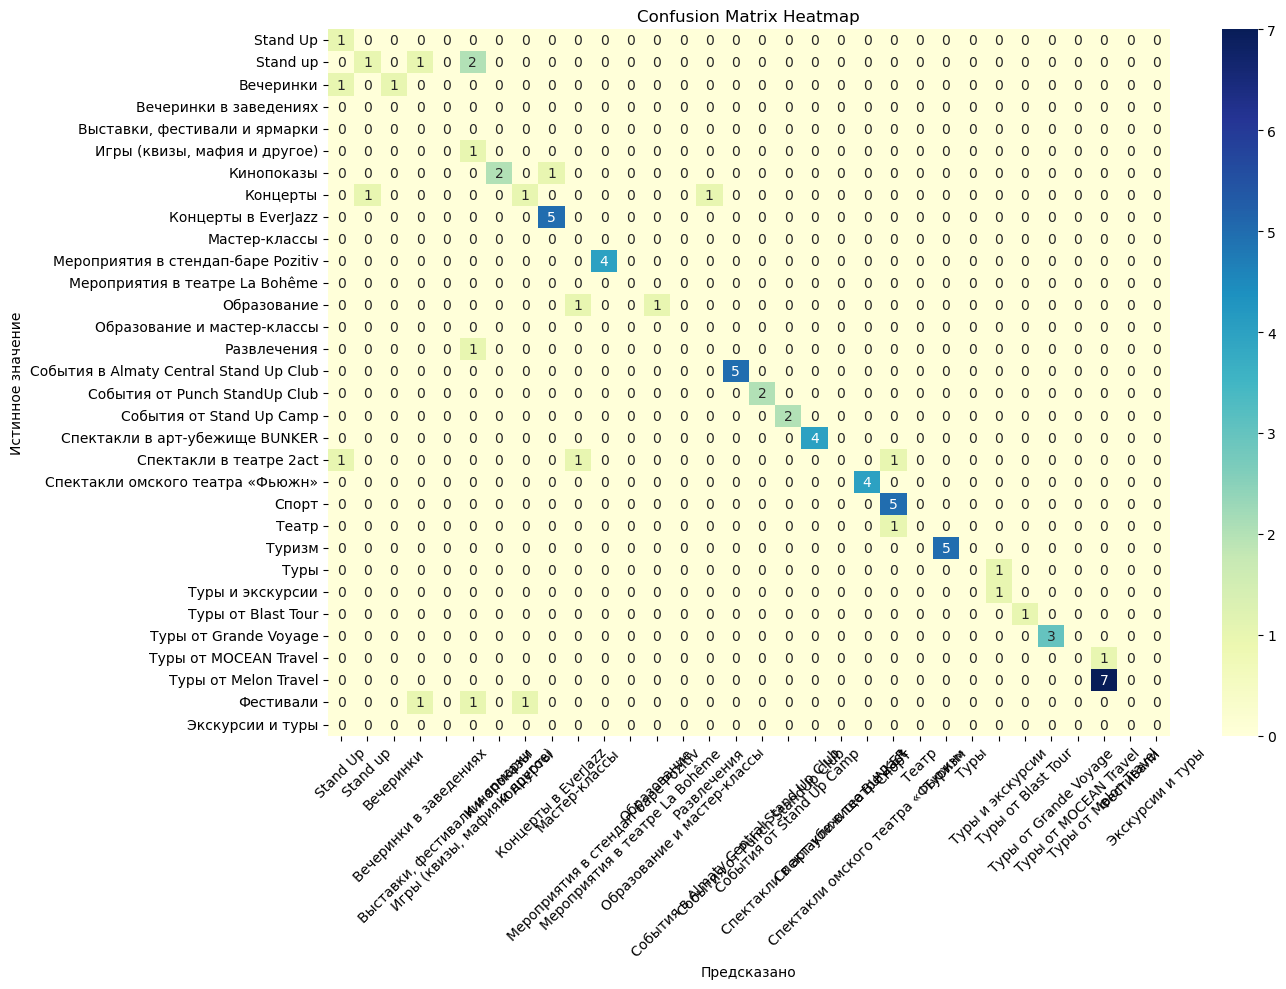

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Предсказано')
plt.ylabel('Истинное значение')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, grid.predict(X_test)))


                                        precision    recall  f1-score   support

                              Stand Up       0.33      1.00      0.50         1
                              Stand up       0.50      0.25      0.33         4
                             Вечеринки       1.00      0.50      0.67         2
                Вечеринки в заведениях       0.00      0.00      0.00         0
          Игры (квизы, мафия и другое)       0.20      1.00      0.33         1
                            Кинопоказы       1.00      0.67      0.80         3
                              Концерты       0.50      0.33      0.40         3
                   Концерты в EverJazz       0.71      1.00      0.83         5
                         Мастер-классы       0.00      0.00      0.00         0
  Мероприятия в винном клубе Love Wine       0.00      0.00      0.00         1
    Мероприятия в стендап-баре Pozitiv       1.00      1.00      1.00         4
                           Образование 

c:\Users\timur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timur\anaconda3\Lib\site-packages\sklea

In [54]:
y_test.value_counts()


category
Туры от Melon Travel                      7
Туризм                                    5
Спорт                                     5
События в Almaty Central Stand Up Club    5
Концерты в EverJazz                       5
Stand up                                  4
Спектакли в арт-убежище BUNKER            4
Спектакли омского театра «Фьюжн»          4
Мероприятия в стендап-баре Pozitiv        4
Спектакли в театре 2act                   3
Кинопоказы                                3
Концерты                                  3
Туры от Grande Voyage                     3
Фестивали                                 3
Образование                               2
События от Stand Up Camp                  2
События от Punch StandUp Club             2
Вечеринки                                 2
Туры и экскурсии                          1
Stand Up                                  1
Туры                                      1
Игры (квизы, мафия и другое)              1
Мероприятия в винном кл